In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/Sales_Transactions_Dataset_Weekly.csv')
df_train = df_train.filter(regex=r'Product|W')
df_train.head(5)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


In [3]:
df_train.tail(5)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0
810,P819,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Drawing PCA

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def draw_pca(X, name):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,cmap=plt.cm.Paired)
    titel="First three directions of "+name 
    ax.set_title(titel)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

In [11]:
from sklearn.decomposition import PCA, FastICA,SparsePCA,NMF, LatentDirichletAllocation,FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection
from sklearn.cluster import KMeans,Birch
#import statsmodels.formula.api as sm
import statsmodels.api as sm
from scipy import linalg
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

In [12]:
X = df_train.drop(['Product_Code','W51'],axis=1)
X=X.fillna(value=0) 
Y = df_train['W51']

In [13]:
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

In [14]:
n_col=50

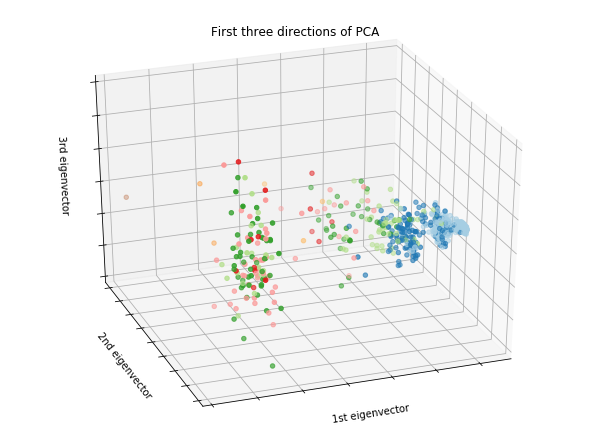

Ypredict [ 4.88902589  3.88902589  6.88902589  6.88902589  9.88902589  4.88902589
  5.88902589  7.88902589  9.88902589 17.88902589  5.88902589  5.88902589
  8.88902589 12.88902589 20.88902589 25.88902589 23.88902589 24.88902589
 23.88902589  8.88902589  4.88902589  6.88902589  4.88902589 24.88902589
 20.88902589  7.88902589 24.88902589 23.88902589 10.88902589 21.88902589
  7.88902589  8.88902589 13.88902589 29.88902589 25.88902589 20.88902589
 26.88902589 23.88902589 27.88902589 19.88902589 22.88902589 22.88902589
 29.88902589 23.88902589 20.88902589 19.88902589 25.88902589 23.88902589
 26.88902589  4.88902589 10.88902589 28.88902589  4.88902589 28.88902589
 21.88902589 24.88902589 21.88902589 29.88902589  7.88902589 23.88902589
 19.88902589 13.88902589 17.88902589 21.88902589  9.88902589 28.88902589
 23.88902589 10.88902589 18.88902589 19.88902589  6.88902589 22.88902589
 20.88902589  8.88902589 23.88902589 20.88902589  4.88902589 21.88902589
 21.88902589 23.88902589 10.88902589  8.88

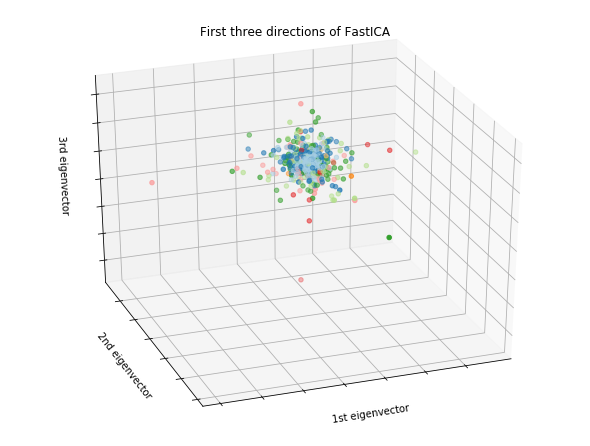

Ypredict [ 4.88902589  3.88902589  6.88902589  6.88902589  9.88902589  4.88902589
  5.88902589  7.88902589  9.88902589 17.88902589  5.88902589  5.88902589
  8.88902589 12.88902589 20.88902589 25.88902589 23.88902589 24.88902589
 23.88902589  8.88902589  4.88902589  6.88902589  4.88902589 24.88902589
 20.88902589  7.88902589 24.88902589 23.88902589 10.88902589 21.88902589
  7.88902589  8.88902589 13.88902589 29.88902589 25.88902589 20.88902589
 26.88902589 23.88902589 27.88902589 19.88902589 22.88902589 22.88902589
 29.88902589 23.88902589 20.88902589 19.88902589 25.88902589 23.88902589
 26.88902589  4.88902589 10.88902589 28.88902589  4.88902589 28.88902589
 21.88902589 24.88902589 21.88902589 29.88902589  7.88902589 23.88902589
 19.88902589 13.88902589 17.88902589 21.88902589  9.88902589 28.88902589
 23.88902589 10.88902589 18.88902589 19.88902589  6.88902589 22.88902589
 20.88902589  8.88902589 23.88902589 20.88902589  4.88902589 21.88902589
 21.88902589 23.88902589 10.88902589  8.88

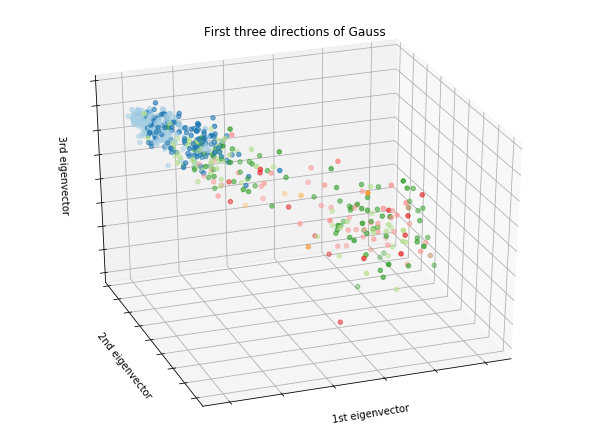

Ypredict [ 5.  4.  6.  6.  6.  4.  5.  6.  9. 15.  7.  3.  7. 10. 22. 29. 33. 24.
 26.  6.  9.  7.  2. 34. 25.  8. 33. 24. 10. 25.  7.  9.  8. 31. 28. 31.
 27. 31. 34. 33. 31. 23. 31. 28. 24. 32. 25. 20. 25.  7. 14. 27.  3. 27.
 23. 21. 31. 26.  6. 26. 26. 13. 26. 30. 10. 24. 32.  9. 23. 29.  6. 29.
 25.  9. 23. 28.  2. 31. 24. 26.  5.  6. 27. 25. 28. 26. 27. 26. 28. 29.
  8. 33.  8.  9.  8. 27. 29.  4.  9. 11. 31. 27.  8.  2.  3.  9. 13.  1.
  5.  4.  4. 30. 25. 10.  8.  9.  5.  9. 27. 30.  7.  8.  1.  4.  8.  1.
  1. 27. 28. 24. 29. 23. 24. 15. 30. 27. 27. 34. 28. 22. 25. 19. 33.  6.
  7.  6.  8.  2.  7.  2.  3.  4.  6.  4.  2.  4.  6.  3.  2.  6.  3.  6.
  0.  6. 10.  8. 27. 28. 28. 34.  8. 27. 31. 31. 23. 29. 29. 30. 29. 27.
 28. 27. 23. 23. 30. 30. 28. 30. 18. 28. 32. 28. 37. 23.  5. 22.  8.  5.
  4. 14.  4. 13.  5.  2.  8.  3.  4. 23. 10.  8.  9.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

/home/park/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


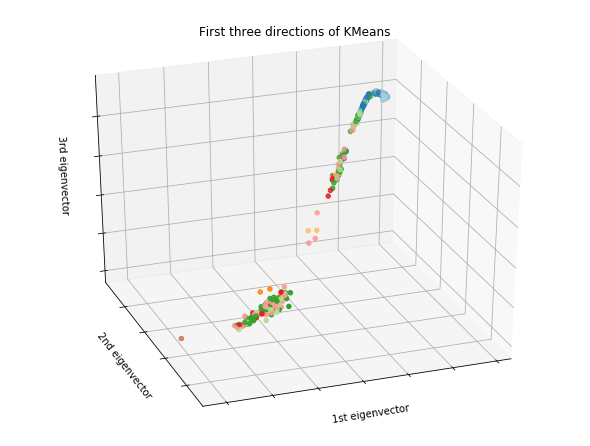

Ypredict [ 8.  5.  9.  9.  9.  6.  5. 10. 11. 22. 12.  5. 10. 15. 19. 21. 23. 22.
 25.  8.  8.  9.  5. 14. 21. 10. 25. 20. 15. 23.  8.  9. 15. 25. 25. 19.
 25. 25. 25. 17. 22. 23. 28. 23. 20. 20. 26. 22. 22.  7. 16. 21.  6. 25.
 24. 21. 25. 26.  9. 22. 21. 17. 16. 22.  9. 31. 23.  9. 17. 22.  8. 22.
 21.  9. 21. 20.  5. 24. 19. 25. 11.  8. 23. 27. 20. 20. 22. 23. 20. 22.
 10. 22.  8. 10. 17. 26. 26.  6. 11. 18. 20. 24.  9.  3.  4. 11. 19.  6.
 10. 10.  5. 30. 23.  9. 11. 10.  5. 11. 23. 23.  9.  9.  4.  7. 10.  5.
  4. 23. 23. 17. 24. 21. 22. 25. 22. 22. 27. 26. 25. 23. 22. 26. 25. 10.
  8.  7.  8.  4.  9.  6.  4. 10.  9.  9.  4.  4.  8.  4.  3.  8.  5.  7.
  5. 12. 10. 10. 24. 18. 33. 29.  8. 24. 22. 24. 25. 24. 26. 26. 25. 24.
 23. 25. 20. 23. 26. 21. 24. 26. 22. 30. 21. 27. 17. 21.  6. 23. 11. 14.
  6. 25.  5. 25.  8.  5. 22.  5. 11. 34. 13. 17. 12.  2.  0.  1.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  

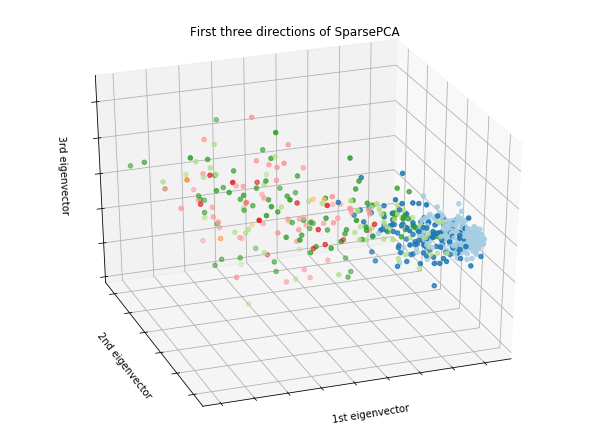

Ypredict [ 5.  3.  6.  6.  9.  4.  5.  7.  9. 18.  5.  5.  8. 12. 20. 27. 26. 24.
 23.  9.  4.  5.  4. 27. 22.  7. 25. 25. 11. 22.  7. 10. 13. 31. 28. 21.
 27. 22. 28. 21. 22. 24. 29. 24. 21. 20. 26. 23. 28.  5. 11. 28.  4. 31.
 21. 24. 22. 31.  8. 23. 20. 14. 17. 22.  9. 30. 25. 12. 18. 20.  6. 23.
 22.  8. 26. 23.  4. 22. 21. 24. 12.  9. 23. 25. 19. 23. 20. 23. 20. 24.
 12. 23.  5. 10. 14. 30. 25.  5. 13. 19. 21. 24.  8.  0.  2. 10. 17.  4.
  8.  8.  5. 30. 25.  7.  8.  9.  3. 13. 27. 23.  7.  8.  3.  4.  9.  3.
  1. 22. 25. 19. 25. 24. 23. 24. 27. 25. 27. 26. 27. 24. 23. 28. 24. 11.
  3.  8.  6.  1.  6.  6.  0.  9.  8.  8.  4.  5.  8.  2.  3.  7.  3.  5.
  6.  9.  8.  6. 23. 22. 28. 27.  7. 22. 30. 24. 25. 28. 24. 27. 25. 22.
 20. 23. 19. 26. 27. 20. 26. 20. 20. 30. 25. 29. 21. 18.  4. 26. 11. 15.
  7. 25.  4. 24.  8.  3. 23.  4.  9. 41. 10. 15.  8.  2.  0.  0.  0.  0.
  1.  0. -1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  

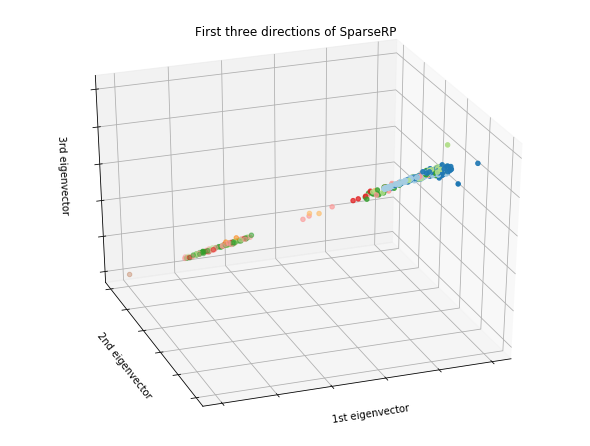

Ypredict [10.  0.  7.  8.  9.  6.  1.  9. 13. 20. 21.  3.  5. 18. 20. 22. 25. 23.
 29.  9.  5.  5.  0. 14. 20. 21. 28. 25. 16. 21.  7.  7. 11. 26. 28. 19.
 29. 24. 25. 22. 27. 16. 27. 16. 20. 14. 20. 27. 23.  9.  7. 20.  9. 26.
 25. 19. 20. 31. 13. 21. 26. 10. 20. 18.  8. 23. 24.  6. 22. 30.  6. 23.
 18. 10. 24. 15.  6. 20. 21. 24. 12.  7. 33. 21. 16. 25. 24. 24. 28. 18.
  9. 19. 10.  9. 14. 21. 25.  5. 11. 21. 15. 29.  6.  4.  4. 21. 20.  4.
 10.  7.  9. 35. 16.  8. 10. 12.  2. 10. 19. 32. 12. 12.  4.  4.  6.  5.
  0. 22. 22. 15. 24. 20. 17. 26. 16. 16. 28. 24. 24. 29. 23. 25. 24. 12.
  7. 13.  3.  7.  5.  3.  4. 11. 10.  6.  5.  4.  5.  5.  7. 11.  6. 13.
  3.  9. 11. 11. 28. 18. 33. 32.  9. 25. 15. 24. 19. 13. 28. 26. 25. 16.
 15. 20. 19. 30. 28. 20. 28. 24. 22. 31. 24. 31. 21. 27.  2. 28. 10. 16.
  2. 26.  4. 23.  7.  4. 17.  5. 12. 45. 15. 14. 14.  1.  1.  0.  0.  1.
  0.  2.  1.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  3.  0.  1.  0.  0.  

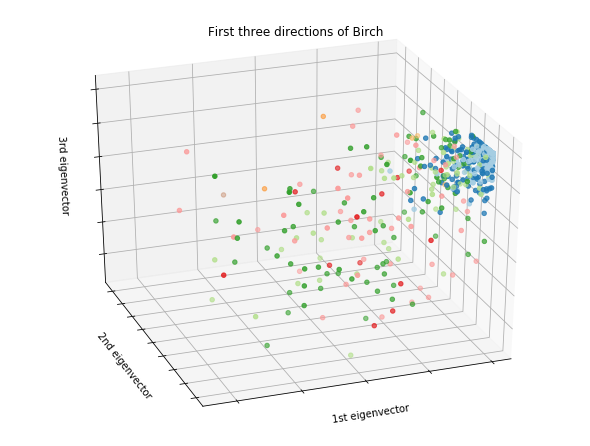

Ypredict [ 4.  4.  6.  6.  9.  3.  5.  8. 10. 18.  6.  5.  9. 13. 21. 25. 24. 24.
 23.  9.  5.  7.  4. 26. 21.  8. 25. 24. 12. 21.  9.  9. 14. 32. 27. 20.
 27. 23. 29. 20. 23. 24. 28. 24. 21. 19. 26. 23. 28.  4. 11. 30.  5. 29.
 22. 27. 21. 30.  8. 23. 20. 14. 18. 21.  9. 28. 23. 11. 18. 18.  6. 22.
 20.  8. 25. 23.  6. 21. 23. 24. 13.  8. 23. 25. 18. 22. 20. 23. 19. 23.
 11. 22.  5. 10. 15. 31. 25.  5. 13. 18. 22. 24.  9.  1.  3. 10. 18.  4.
  9.  8.  4. 30. 25.  7.  8.  9.  4. 14. 27. 24.  8.  9.  4.  4. 10.  4.
  3. 23. 27. 18. 25. 24. 23. 24. 25. 26. 26. 27. 28. 25. 21. 29. 25. 11.
  3.  7.  6.  1.  6.  6.  1. 10.  8.  8.  5.  4.  8.  2.  3.  7.  4.  6.
  5. 10.  8.  5. 24. 21. 28. 26.  6. 23. 29. 24. 26. 28. 26. 26. 26. 22.
 21. 21. 19. 27. 25. 21. 24. 21. 22. 29. 26. 27. 20. 18.  4. 26. 10. 16.
  5. 25.  4. 24.  8.  4. 23.  4.  9. 43. 11. 14.  9.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  

In [15]:
names = [
         'PCA',
         'FastICA',
         'Gauss',
         'KMeans',
         'SparsePCA',
         'SparseRP',
         'Birch',
         'NMF',    
       #  'LatentDietrich',    
        ]

classifiers = [
    
    PCA(n_components=n_col),
    FastICA(n_components=n_col),
    GaussianRandomProjection(n_components=3),
    KMeans(n_clusters=n_col),
    #SparsePCA(n_components=n_col),
    SparseRandomProjection(n_components=n_col, dense_output=True),
    Birch(branching_factor=10, n_clusters=7, threshold=0.5),
    NMF(n_components=n_col),    
  #  LatentDirichletAllocation(n_topics=n_col),
    
]
correction= [1,1,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf,correct in temp:
    Xr=clf.fit_transform(X,Y)
    draw_pca(Xr,name)
    res = sm.OLS(Y,Xr).fit()
    #print(res.summary())  # show OLS regression
    #print(res.predict(Xr).round()+correct)  #show OLS prediction
    #print('Ypredict',res.predict(Xr).round()+correct)  #show OLS prediction
    
    print('Ypredict',res.predict(Xr).round()+correct*Y.mean())  #show OLS prediction
    print(name,'%error',procenterror(res.predict(Xr)+correct*Y.mean(),Y),'rmsle',rmsle(res.predict(Xr)+correct*Y.mean(),Y)) #
    

ref ) https://www.kaggle.com/plarmuseau/sales-exploration